This beginning research is to understand the MP voting record dataset and find out ways to use it for Orwell, the Virtual MP app.

# MP voting data and clustering

In [152]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
#from lightfm import LightFM

### Data

In [153]:
# Create fake MP voting data

# Lets say there are 10 different bills: 3 leftwing, 3 rightwing, 3 middleground and 1 other (e.g. anarchistic)
bill_list = ['left1','left2','left3','right1','right2','right3','mid1','mid2','mid3','other1']
num_bills = 10 #len(bill_list)

# And 10 MPs in a random voting configuration
#MPs = ['l1','l2','l3','r1','r2','r3','m1','m2','m3','o1']
num_MPs = 100
MPs = np.ones((num_MPs,1))

# And a voting schematic (mps v bills)
np.random.seed(0)
#votes = np.random.binomial(n=1,p=0.5,size=(num_MPs,num_bills))

'''
#fake vote set 1
votes1 = np.ones((num_MPs/2,num_bills),dtype=int)
votes2 = np.zeros((num_MPs/2,num_bills),dtype=int)
votes = np.append(votes1, votes2)
votes=votes.reshape((100,10))
'''

#fake vote set 2
votesl = np.tile(np.array([1,1,1, 0,0,0, 0,0,0, 0]),30)
votesr = np.tile(np.array([0,0,0, 1,1,1, 0,0,0, 0]),30)
votesm = np.tile(np.array([0,0,0, 0,0,0, 1,1,1, 0]),30)
voteso = np.tile(np.array([0,0,0, 0,0,0, 0,0,0, 1]),10)
votes = np.concatenate((votesl,votesr,votesm,voteso), axis=None)
votes=votes.reshape((100,10))
vote_flip = np.random.binomial(n=1,p=0.05,size=(num_MPs,num_bills))
votes = (votes + vote_flip)%2
x_subset = votes

In [154]:
votes

array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0,

### Plotting function

In [121]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

## PCA

In [122]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print 'PCA done! Time elapsed: {} seconds'.format(time.time()-time_start)

PCA done! Time elapsed: 0.00100016593933 seconds


In [123]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print 'Variance explained per principal component: {}'.format(pca.explained_variance_ratio_)

Variance explained per principal component: [ 0.37205268  0.35516317  0.10365025  0.04657098]


### Clustering

In [124]:
from sklearn.cluster import KMeans

PCA_dict = {'pca1': pca_result[:,0], 'pca2':pca_result[:,1]}
df = pd.DataFrame(PCA_dict,columns=['pca1','pca2'])
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.95386442 -0.87325663]
 [ 0.19506208  0.10944615]
 [-0.34487754  1.2367319 ]
 [ 1.22831101 -0.3909194 ]]


In [135]:
y_subset = np.array(kmeans.labels_)
y_subset

array([3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [136]:
[len(y_subset[y_subset==0]), len(y_subset[y_subset==1]), len(y_subset[y_subset==2]), len(y_subset[y_subset==3])]

[29, 15, 28, 28]

(<Figure size 576x576 with 1 Axes>,
 [Text(-1.0325,-0.966904,'0'),
  Text(0.0668811,0.0174212,'1'),
  Text(-0.32105,1.37193,'2'),
  Text(1.34542,-0.416915,'3')])

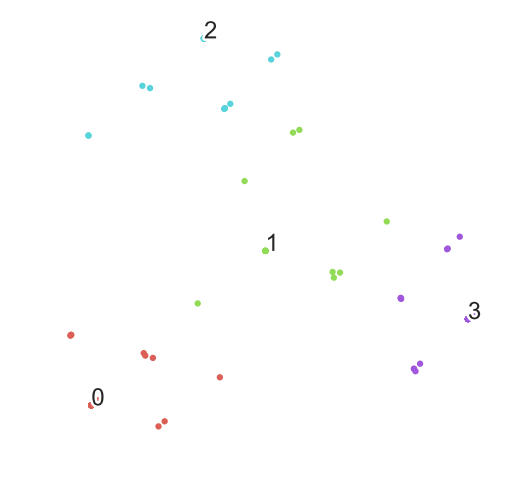

In [137]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

### VS labelled PCA

In [138]:
#fake classes for each MP
#left 0,right 1,mid 2,other 3
y_list = ['0']*30 + ['1']*30 + ['2']*30 + ['3']*10
y_list_int = map(int, y_list)
y_subset = np.array(y_list_int)

(<Figure size 576x576 with 1 Axes>,
 [Text(1.34542,-0.416915,'0'),
  Text(-0.32105,1.37193,'1'),
  Text(-1.0325,-0.966904,'2'),
  Text(0.0668811,0.0174212,'3')])

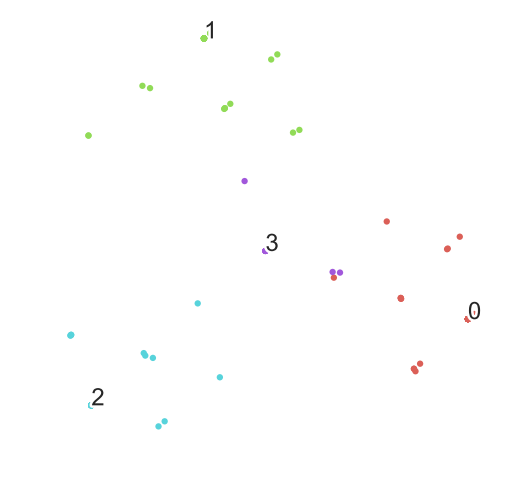

In [139]:
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

## t-SNE

In [140]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

t-SNE done! Time elapsed: 0.512000083923 seconds


In [145]:
#fashion_tsne[:,0]

### K-means

In [146]:
from sklearn.cluster import KMeans


PCA_dict = {'pca1': fashion_tsne[:,0], 'pca2':fashion_tsne[:,1]}
df = pd.DataFrame(PCA_dict,columns=['pca1','pca2'])
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.06556003  0.4117947 ]
 [-1.74483614 -0.93898635]
 [-6.2166376   2.98908292]
 [-3.43303351 -4.89826532]]


In [147]:
y_subset = np.array(kmeans.labels_)
y_subset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

(<Figure size 576x576 with 1 Axes>,
 [Text(2.15957,0.491658,'0'),
  Text(-1.80666,-0.922663,'1'),
  Text(-6.24193,3.11379,'2'),
  Text(-3.4385,-4.97182,'3')])

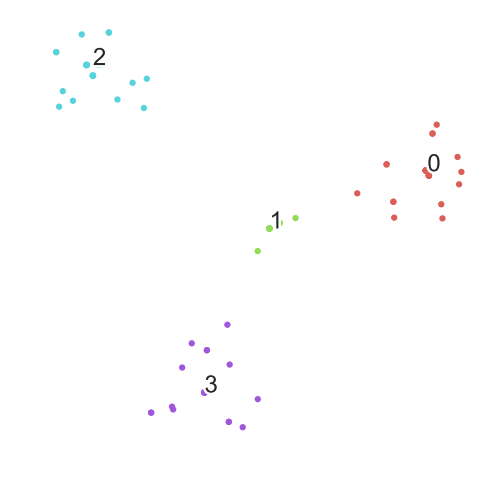

In [148]:
fashion_scatter(fashion_tsne, y_subset)

### VS labelled t-SNE

In [149]:
#fake classes for each MP
#left 0,right 1,mid 2,other 3
y_list = ['0']*30 + ['1']*30 + ['2']*30 + ['3']*10
y_list_int = map(int, y_list)
y_subset = np.array(y_list_int)

(<Figure size 576x576 with 1 Axes>,
 [Text(2.15957,0.491658,'0'),
  Text(-3.4385,-4.97182,'1'),
  Text(-6.24193,3.11379,'2'),
  Text(-1.80666,-0.922663,'3')])

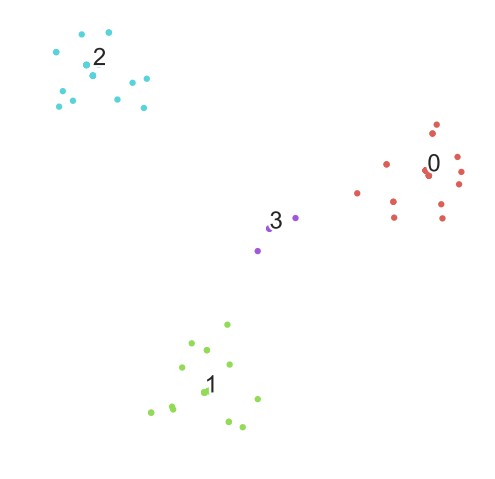

In [151]:
fashion_scatter(fashion_tsne,y_subset) # Visualizing the PCA output